In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib import pyplot as plt
%matplotlib inline

sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

In [2]:
# Reading in streaming history
df = pd.read_excel('Spotify_Streaming_11_21.xlsx', index_col = 0)
df.head()

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,albumName,albumID
0,Really___BLACKPINK,2020-11-21 20:27:00,BLACKPINK,Really,52593,2020-11-21 20:27:00,0.696,0.881,1,-2.082,...,142.019,audio_features,2URMA0ap6SAI8wFmcY1yta,spotify:track:2URMA0ap6SAI8wFmcY1yta,https://api.spotify.com/v1/tracks/2URMA0ap6SAI...,https://api.spotify.com/v1/audio-analysis/2URM...,197789,4,SQUARE UP,0wOiWrujRbxlKEGWRQpKYc
1,Tokyo___1000 Beasts,2020-11-23 01:13:00,1000 Beasts,Tokyo,235752,2020-11-23 01:13:00,0.743,0.879,5,-2.717,...,101.968,audio_features,2Anpk7AihEt38POoMEDqRb,spotify:track:2Anpk7AihEt38POoMEDqRb,https://api.spotify.com/v1/tracks/2Anpk7AihEt3...,https://api.spotify.com/v1/audio-analysis/2Anp...,174118,4,Tokyo,6d3HWabKzWkK630NH33OOK
2,Loom (feat. Bonobo)___Ã“lafur Arnalds,2020-11-23 14:51:00,Ã“lafur Arnalds,Loom (feat. Bonobo),221239,2020-11-23 14:51:00,0.545,0.180,5,-21.022,...,156.694,audio_features,3Yagxg6rtkwN01AYzA862i,spotify:track:3Yagxg6rtkwN01AYzA862i,https://api.spotify.com/v1/tracks/3Yagxg6rtkwN...,https://api.spotify.com/v1/audio-analysis/3Yag...,226867,4,Loom,2kfPunUS5HqupNVAueFmgM
3,Loom (feat. Bonobo)___Ã“lafur Arnalds,2020-11-24 01:05:00,Ã“lafur Arnalds,Loom (feat. Bonobo),5565,2020-11-24 01:05:00,0.545,0.180,5,-21.022,...,156.694,audio_features,3Yagxg6rtkwN01AYzA862i,spotify:track:3Yagxg6rtkwN01AYzA862i,https://api.spotify.com/v1/tracks/3Yagxg6rtkwN...,https://api.spotify.com/v1/audio-analysis/3Yag...,226867,4,Loom,2kfPunUS5HqupNVAueFmgM
4,Yes 2 Bucket Hats___Paul & Shark,2020-11-24 01:07:00,Paul & Shark,Yes 2 Bucket Hats,79026,2020-11-24 01:07:00,0.776,0.924,11,-5.209,...,130.033,audio_features,7gQ6y5aP84gE0xjMH0n10g,spotify:track:7gQ6y5aP84gE0xjMH0n10g,https://api.spotify.com/v1/tracks/7gQ6y5aP84gE...,https://api.spotify.com/v1/audio-analysis/7gQ6...,265875,4,FREETIME003 - B,6AGrwvMxuajVmBhE80D5s0


In [3]:
df.shape

(21429, 26)

In [5]:
df.columns

Index(['name', 'endTime', 'artistName', 'trackName', 'msPlayed', 'datetime',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'albumName', 'albumID'],
      dtype='object')

In [6]:
# Checking for null values
df.isnull().any()

name                False
endTime             False
artistName          False
trackName           False
msPlayed            False
datetime            False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
type                False
id                  False
uri                 False
track_href          False
analysis_url        False
duration_ms         False
time_signature      False
albumName           False
albumID             False
dtype: bool

In [7]:
# Checking for duplicate entries
df[df.duplicated()]

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,albumName,albumID


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21429 entries, 0 to 21428
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              21429 non-null  object        
 1   endTime           21429 non-null  datetime64[ns]
 2   artistName        21429 non-null  object        
 3   trackName         21429 non-null  object        
 4   msPlayed          21429 non-null  int64         
 5   datetime          21429 non-null  datetime64[ns]
 6   danceability      21429 non-null  float64       
 7   energy            21429 non-null  float64       
 8   key               21429 non-null  int64         
 9   loudness          21429 non-null  float64       
 10  mode              21429 non-null  int64         
 11  speechiness       21429 non-null  float64       
 12  acousticness      21429 non-null  float64       
 13  instrumentalness  21429 non-null  float64       
 14  liveness          2142

In [9]:
# Checking if these two columns are the same
df[['msPlayed', 'duration_ms']] 

,msPlayed,duration_ms
0,52593,197789
1,235752,174118
2,221239,226867
3,5565,226867
4,79026,265875
...,...,...
21424,214049,214049
21425,244250,262920
21426,149610,149610
21427,33312,430752


In [4]:
# Create new column with minutes listened to
df['minutesPlayed'] = (df['msPlayed'] / 60000).astype('int64')

# Create new column with total length of song in minutes
df['totalMinutes'] = df['duration_ms'] / 60000

# Create new columns with song name & artist
df['name'] = df['name'].str.replace('___',' by ')

# Create artist column
df['artist']= df['name'].str.split('by').str[-1]

# Create column with only date, time, day, hour, month, year, day name
df['date'] = [d.date() for d in df['endTime']]
df['time'] = [d.time() for d in df['endTime']]
df['day'] = df['endTime'].dt.day
df['hour'] = df['endTime'].dt.hour
df['month'] = df['endTime'].dt.month_name()
df['year'] = df['endTime'].dt.year
df['dayName'] = df['endTime'].dt.day_name()

In [5]:
# Saving a copy of this dataframe for later
xy = df.copy()

In [125]:
df.to_csv('2020-2021 Streaming Data',index=False)

## Data Exploration

In [53]:
df.head()

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,albumID,minutesPlayed,totalMinutes,artist,time,day,hour,month,year,dayName
0,Really by BLACKPINK,2020-11-21 20:27:00,BLACKPINK,Really,52593,2020-11-21 20:27:00,0.696,0.881,1,-2.082,...,0wOiWrujRbxlKEGWRQpKYc,0,3.296483,BLACKPINK,20:27:00,21,20,November,2020,Saturday
1,Tokyo by 1000 Beasts,2020-11-23 01:13:00,1000 Beasts,Tokyo,235752,2020-11-23 01:13:00,0.743,0.879,5,-2.717,...,6d3HWabKzWkK630NH33OOK,3,2.901967,1000 Beasts,01:13:00,23,1,November,2020,Monday
2,Loom (feat. Bonobo) by Ã“lafur Arnalds,2020-11-23 14:51:00,Ã“lafur Arnalds,Loom (feat. Bonobo),221239,2020-11-23 14:51:00,0.545,0.180,5,-21.022,...,2kfPunUS5HqupNVAueFmgM,3,3.781117,Ã“lafur Arnalds,14:51:00,23,14,November,2020,Monday
3,Loom (feat. Bonobo) by Ã“lafur Arnalds,2020-11-24 01:05:00,Ã“lafur Arnalds,Loom (feat. Bonobo),5565,2020-11-24 01:05:00,0.545,0.180,5,-21.022,...,2kfPunUS5HqupNVAueFmgM,0,3.781117,Ã“lafur Arnalds,01:05:00,24,1,November,2020,Tuesday
4,Yes 2 Bucket Hats by Paul & Shark,2020-11-24 01:07:00,Paul & Shark,Yes 2 Bucket Hats,79026,2020-11-24 01:07:00,0.776,0.924,11,-5.209,...,6AGrwvMxuajVmBhE80D5s0,1,4.431250,Paul & Shark,01:07:00,24,1,November,2020,Tuesday


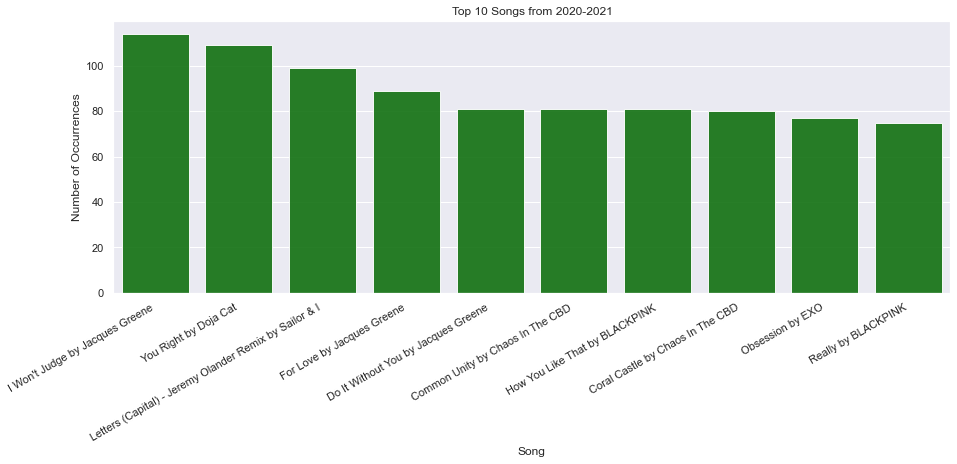

In [54]:
# What song(s) are the most listened to?

f = plt.figure(figsize=(15,5)) 
f.patch.set_facecolor('w')

song_count  = df['name'].value_counts()
song_count = song_count[:10]
chart = sns.barplot(x= song_count.index, y= song_count.values, alpha=.9, color='green')
plt.title('Top 10 Songs from 2020-2021')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Song', fontsize=12)
chart.set_xticklabels(song_count.index, rotation=30, horizontalalignment='right')

plt.show()

C:\Users\kimje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


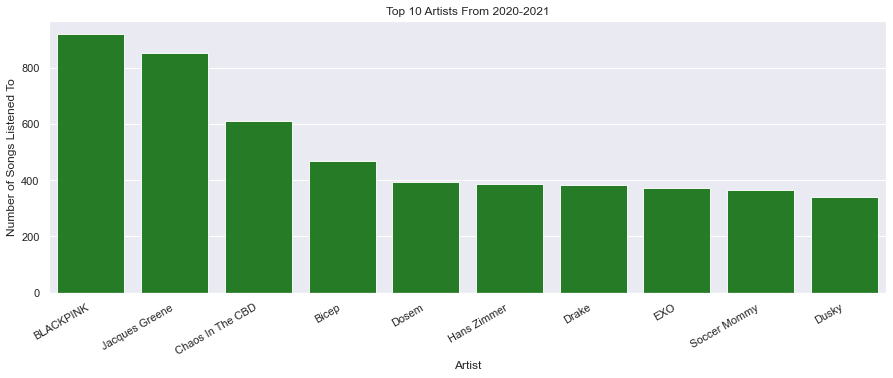

In [55]:
# Which artists have the most plays?
song_count = df['artistName'].value_counts()
song_count = song_count[:10]
plt.figure(figsize=(15,5))
chart = sns.barplot(song_count.index, song_count.values, alpha=0.9, color='green')
plt.title('Top 10 Artists From 2020-2021')
plt.ylabel('Number of Songs Listened To', fontsize=12)
plt.xlabel('Artist', fontsize=12)
xticks=chart.xaxis.get_major_ticks()
chart.set_xticklabels(song_count.index, rotation=30,horizontalalignment='right')

plt.show()

C:\Users\kimje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


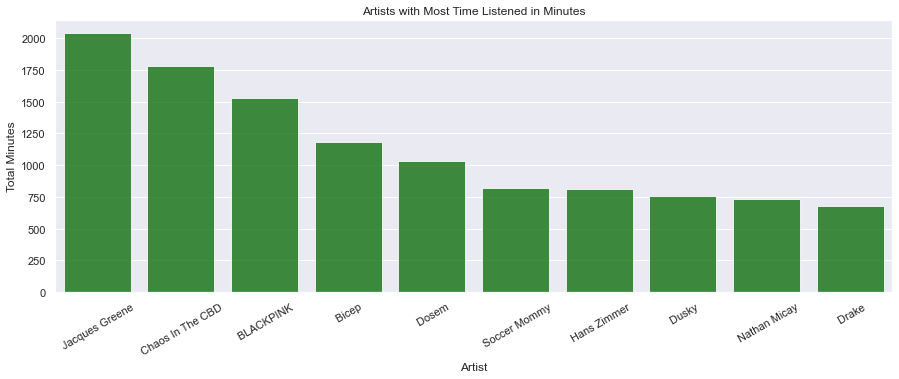

In [68]:
# Which artists have the most minutes listened to?

b = df.groupby('artist')['minutesPlayed'].sum().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(15,5))
chart = sns.barplot(b['artist'], b['minutesPlayed'], alpha=0.8, color='green')
plt.title('Artists with Most Time Listened in Minutes')
plt.ylabel('Total Minutes', fontsize=12)
plt.xlabel('Artist', fontsize=12)
xticks=chart.xaxis.get_major_ticks()
chart.set_xticklabels(b['artist'], rotation=30)

plt.show()

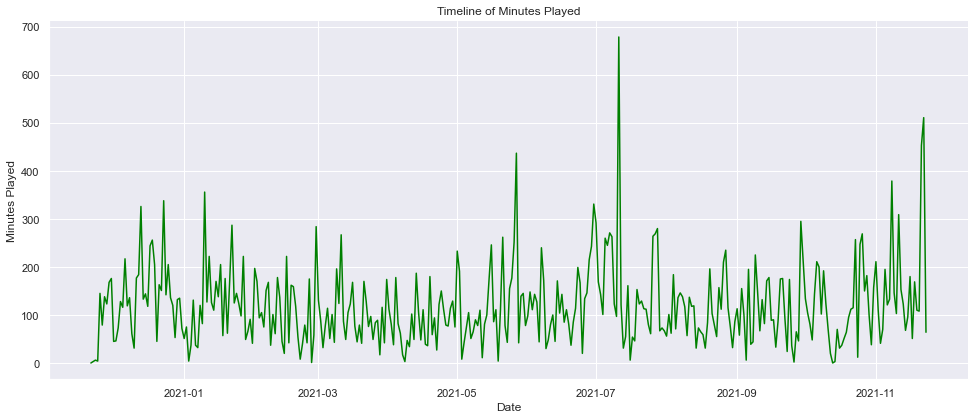

In [112]:
# How has the amount of music listened to per day changed over the year?
d = df.groupby('date')['minutesPlayed'].sum().reset_index()
chart = sns.relplot(x='date', y='minutesPlayed', kind="line", data=d, color='green').set(title='Timeline of Minutes Played')
#chart.fig.autofmt_xdate()
chart.fig.set_figwidth(15)
chart.fig.set_figheight(5.7)
chart.set(xlabel='Date', ylabel='Minutes Played')

C:\Users\kimje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


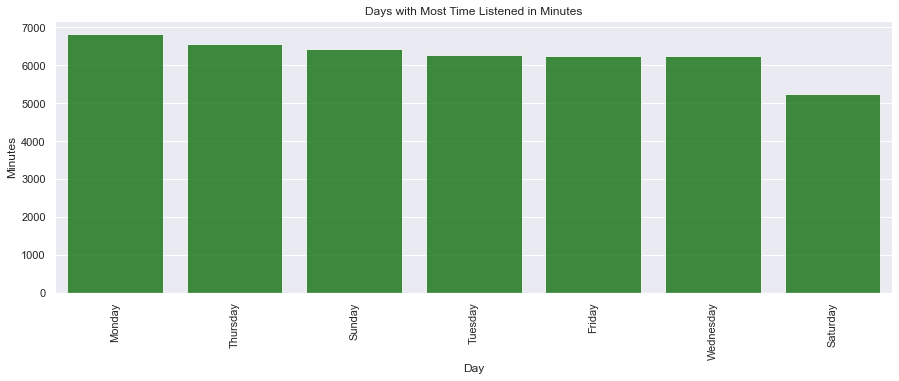

In [79]:
# Which day of the week has the most minutes listened to?
e = df.groupby('dayName')['minutesPlayed'].sum().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(15,5))
chart = sns.barplot(e['dayName'], e['minutesPlayed'], alpha=0.8, color='green')
plt.title('Days with Most Time Listened in Minutes')
plt.ylabel('Minutes', fontsize=12)
plt.xlabel('Day', fontsize=12)
xticks=chart.xaxis.get_major_ticks()
chart.set_xticklabels(e['dayName'], rotation=90)

plt.show()

C:\Users\kimje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


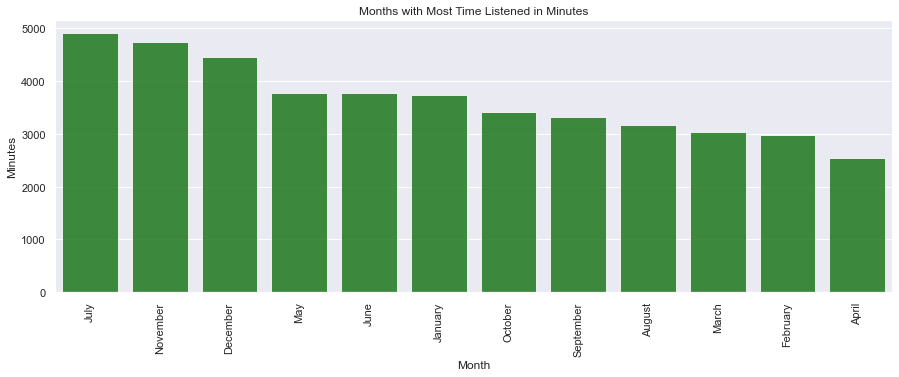

In [82]:
#Which month of the year has the most minutes of music listened to?
e = df.groupby('month')['minutesPlayed'].sum().sort_values(ascending=False)[:12].reset_index()
plt.figure(figsize=(15,5))
chart = sns.barplot(e['month'], e['minutesPlayed'], alpha=0.8, color='green')
plt.title('Months with Most Time Listened in Minutes')
plt.ylabel('Minutes', fontsize=12)
plt.xlabel('Month', fontsize=12)
xticks=chart.xaxis.get_major_ticks()
chart.set_xticklabels(e['month'], rotation=90)

plt.show()

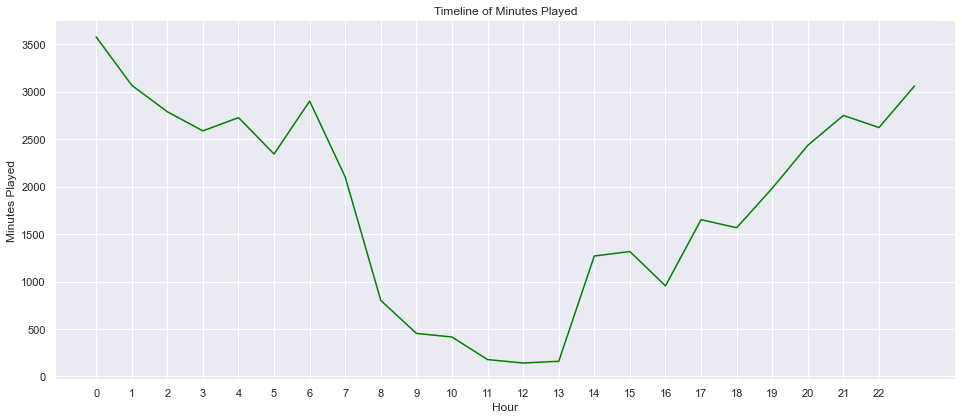

In [7]:
# How has the amount of music listened changed over the day?
d = df.groupby('hour')['minutesPlayed'].sum().reset_index()
chart = sns.relplot(x='hour', y='minutesPlayed', kind="line", data=d, color='green').set(title='Timeline of Minutes Played')
#chart.fig.autofmt_xdate()
chart.fig.set_figwidth(15)
chart.fig.set_figheight(5.7)
chart.set(xticks=np.arange(0,23,1))
chart.set(xlabel='Hour', ylabel='Minutes Played')

### Understanding the features of each song

acousticness - float - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability - float - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - float - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

instrumentalness - float - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

liveness - float - Detects the presence of an audience in the recording.

loudness - float - The overall loudness of a track in decibels (dB).

speechiness - float - Speechiness detects the presence of spoken words in a track.

valence - float - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.

tempo - float - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

mode - int - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

key - int - The estimated overall key of the track.

## Analyzing Top 200 Songs

In [123]:
# Creating a new dataframe with audio features of top 100 songs
song_count = xy['name'].value_counts()[:200]
xy = xy.loc[xy['name'].isin(song_count.index)].drop_duplicates(subset=['name'])
xy.head()

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,minutesPlayed,totalMinutes,artist,time,day,hour,month,year,dayName,date
0,Really by BLACKPINK,2020-11-21 20:27:00,BLACKPINK,Really,52593,2020-11-21 20:27:00,0.696,0.881,1,-2.082,...,0,3.296483,BLACKPINK,20:27:00,21,20,November,2020,Saturday,2020-11-21
9,6000 Ft. by Bonobo,2020-11-24 06:49:00,Bonobo,6000 Ft.,1471,2020-11-24 06:49:00,0.656,0.902,8,-9.453,...,0,5.601533,Bonobo,06:49:00,24,6,November,2020,Tuesday,2020-11-24
20,DDU-DU DDU-DU by BLACKPINK,2020-11-25 01:45:00,BLACKPINK,DDU-DU DDU-DU,181162,2020-11-25 01:45:00,0.668,0.828,4,-5.034,...,3,3.522500,BLACKPINK,01:45:00,25,1,November,2020,Wednesday,2020-11-25
26,Inter by Yotto,2020-11-25 02:00:00,Yotto,Inter,284133,2020-11-25 02:00:00,0.726,0.371,9,-14.008,...,4,4.260000,Yotto,02:00:00,25,2,November,2020,Wednesday,2020-11-25
44,Apricots by Bicep,2020-11-25 02:50:00,Bicep,Apricots,4949,2020-11-25 02:50:00,0.819,0.599,11,-6.778,...,0,4.108450,Bicep,02:50:00,25,2,November,2020,Wednesday,2020-11-25


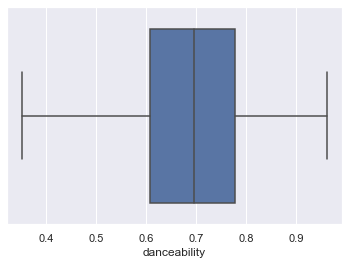

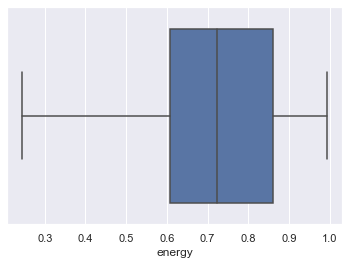

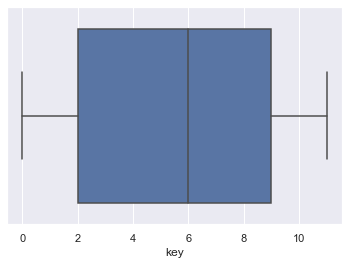

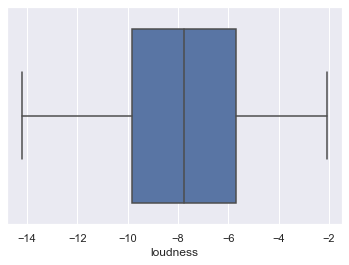

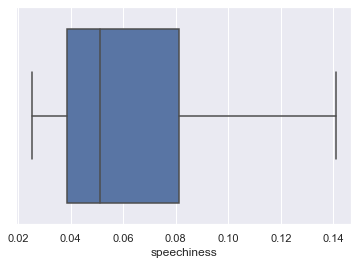

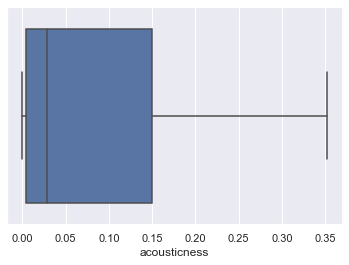

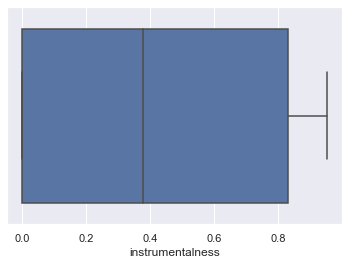

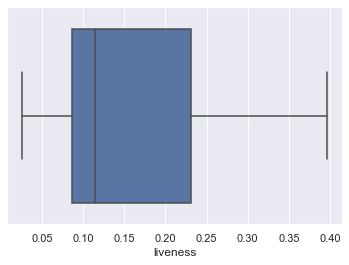

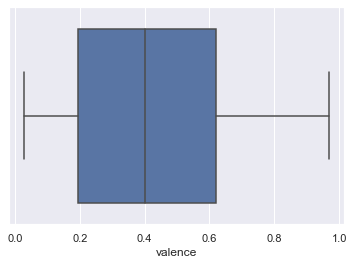

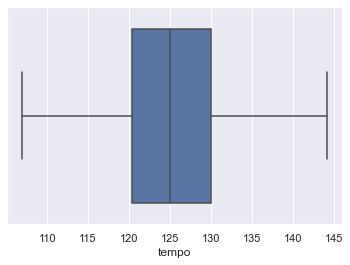

In [118]:
# What is the average value for each audio feature?
for feature in xy[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',]]:
    sns.boxplot(showfliers = False, x=xy[feature])
    plt.show()

[Text(0.5, 1.0, 'Coorelations Between Audio Features in Top 100 Songs')]

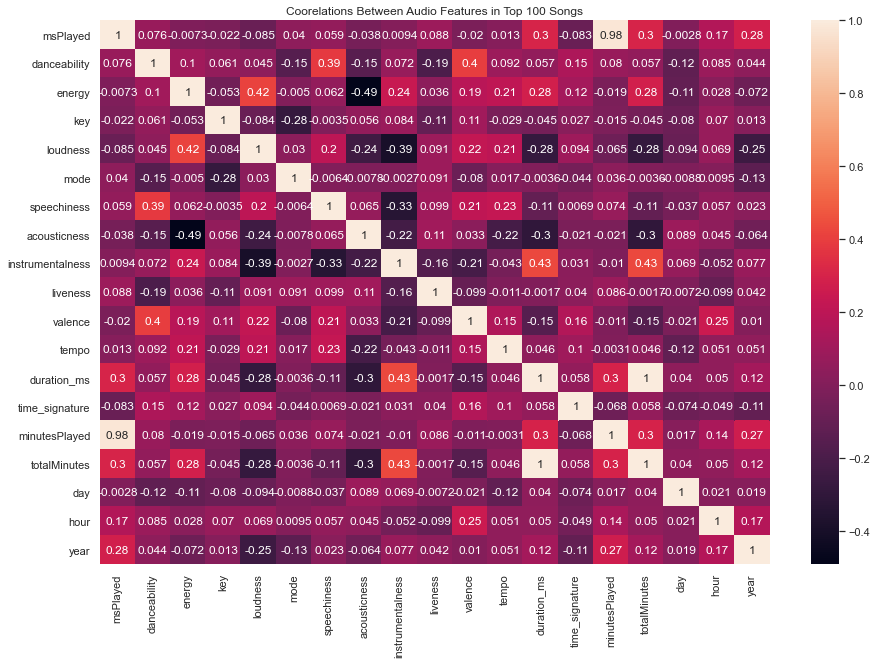

In [122]:
# Understanding how song features relate in the top 100
corr = xy.corr(method='spearman')
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True).set(title='Coorelations Between Audio Features in Top 100 Songs')